# Shipment Data Feature Engineering

## 🔧 Data Cleaning & Feature Engineering Pipeline

We will perform the following 7 steps to prepare the dataset for modeling:

1. **Missing Value Imputation**  

2. **Standardization / Normalization**  

3. **Feature Selection**

4. **Outlier Capping**  

5. **Encoding Categorical Variables**  

4. **Feature Extraction**

7. **Principal Component Analysis (PCA)** *(Optional)*  

 

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('data/shipment.csv')
df.head()


,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [12]:

print(df.shape) 


(6500, 20)


<h1 style="color:#2C3E50; font-size:32px;"><b>1.Handling Missing Values</b></h1>

In [13]:
df.isnull().sum()


Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

<h2 style="color:#2C3E50;"><b>1.1 Separating Data into Categorical and Numerical Columns</b></h2>

In [14]:
df.dtypes


Customer Id               object
Artist Name               object
Artist Reputation        float64
Height                   float64
Width                    float64
Weight                   float64
Material                  object
Price Of Sculpture       float64
Base Shipping Price      float64
International             object
Express Shipment          object
Installation Included     object
Transport                 object
Fragile                   object
Customer Information      object
Remote Location           object
Scheduled Date            object
Delivery Date             object
Customer Location         object
Cost                     float64
dtype: object

In [15]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'O']
numerical_cols = [col for col in df.columns if df[col].dtype != 'O']

categorical_cols



['Customer Id',
 'Artist Name',
 'Material',
 'International',
 'Express Shipment',
 'Installation Included',
 'Transport',
 'Fragile',
 'Customer Information',
 'Remote Location',
 'Scheduled Date',
 'Delivery Date',
 'Customer Location']

In [11]:
numerical_cols

['Artist Reputation',
 'Height',
 'Width',
 'Weight',
 'Price Of Sculpture',
 'Base Shipping Price',
 'Cost']

 <b>Numerical columns with missing values:</b>  
<ul>
  <li><code>Artist Reputation</code> (750 missing)</li>
  <li><code>Height</code> (375 missing)</li>
  <li><code>Width</code> (584 missing)</li>
  <li><code>Weight</code> (587 missing)</li>
</ul>

✅ <b>Categorical columns with missing values:</b>  
<ul>
  <li><code>Material</code> (764 missing)</li>
  <li><code>Transport</code> (1392 missing)</li>
  <li><code>Remote Location</code> (771 missing)</li>
</ul>



<h2 style="color:#2C3E50;"><b>1.2 Understanding Missing Data Assumptions</b></h2>

<table style="width:100%; border: 1px solid gray; border-collapse: collapse;">
  <thead style="background-color:#f2f2f2;">
    <tr>
      <th style="padding:10px; border: 1px solid gray;">Type</th>
      <th style="padding:10px; border: 1px solid gray;">Meaning</th>
      <th style="padding:10px; border: 1px solid gray;">Handling Strategy</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border: 1px solid gray;"><b>MCAR</b></td>
      <td style="padding:10px; border: 1px solid gray;">Missing Completely At Random – No pattern.</td>
      <td style="padding:10px; border: 1px solid gray;">Drop rows or impute freely; no bias introduced.</td>
    </tr>
    <tr>
      <td style="padding:10px; border: 1px solid gray;"><b>MAR</b></td>
      <td style="padding:10px; border: 1px solid gray;">Missing At Random – Related to other columns, not the value itself.</td>
      <td style="padding:10px; border: 1px solid gray;">Impute using other feature values (mean/median/mode).</td>
    </tr>
    <tr>
      <td style="padding:10px; border: 1px solid gray;"><b>MNAR</b></td>
      <td style="padding:10px; border: 1px solid gray;">Missing Not At Random – Depends on the value itself.</td>
      <td style="padding:10px; border: 1px solid gray;">Hard to handle; may require modeling the missingness itself.</td>
    </tr>
  </tbody>
</table>


### No Obvious Pattern in Missingness

From a domain standpoint:

- **Weight, Height, and Width** are physical attributes of the shipment. These values should generally be either fully recorded or missing due to measurement oversight. Their missingness is unlikely to depend on variables like `Transport` or `Artist Reputation`, suggesting random omission.

- **Remote Location** and **Transport** data may be missing due to occasional lapses in data entry or unavailability of information during certain transactions. These gaps are not clearly linked to other features in the dataset.

- The fact that **Artist Reputation**, **Material**, and **Transport** all have different rates of missing data — and are not missing simultaneously — supports the idea that the missingness occurs independently, rather than as a result of some underlying condition or rule.

Thus, based on the distribution and context of the missing values, we assume that the data is **Missing Completely At Random (MCAR)**.



<h2 style="color:#2C3E50;"><b>1.2 Imputation techniques</b></h2>

<h3 style="color:#8E44AD;">🔢 Numerical Columns (e.g., <code>float64</code>):</h3>

- <b>Mean imputation</b>: Good for symmetric, normally distributed data.
- <b>Median imputation</b>: Good for skewed data or when outliers are present.  
- <b>Mode imputation</b>: For discrete numerical data.  
- <b>Model-based imputation</b>: Advanced methods like Regression, KNN.

<h3 style="color:#8E44AD;">🔤 Categorical Columns (e.g., <code>object</code>):</h3>

- <b>Mode imputation</b>: Fill with the most frequent category.  
- <b>Constant value</b>: Use placeholder like <code>"Unknown"</code> or <code>"Missing"</code>.  
- <b>Model-based or frequency-based imputation</b>: For better pattern-based prediction.

---

<h2 style="color:#2980B9;"><b>📊 Univariate Analysis on Numerical Data</b></h2>

You can use <code>sns.kdeplot</code> to visualize the distribution of each numerical column.  
This helps in deciding whether to use <b>mean</b> or <b>median</b> for imputation.


UNIVARAIATE ANALYSIS ON NUMERICAL DATA

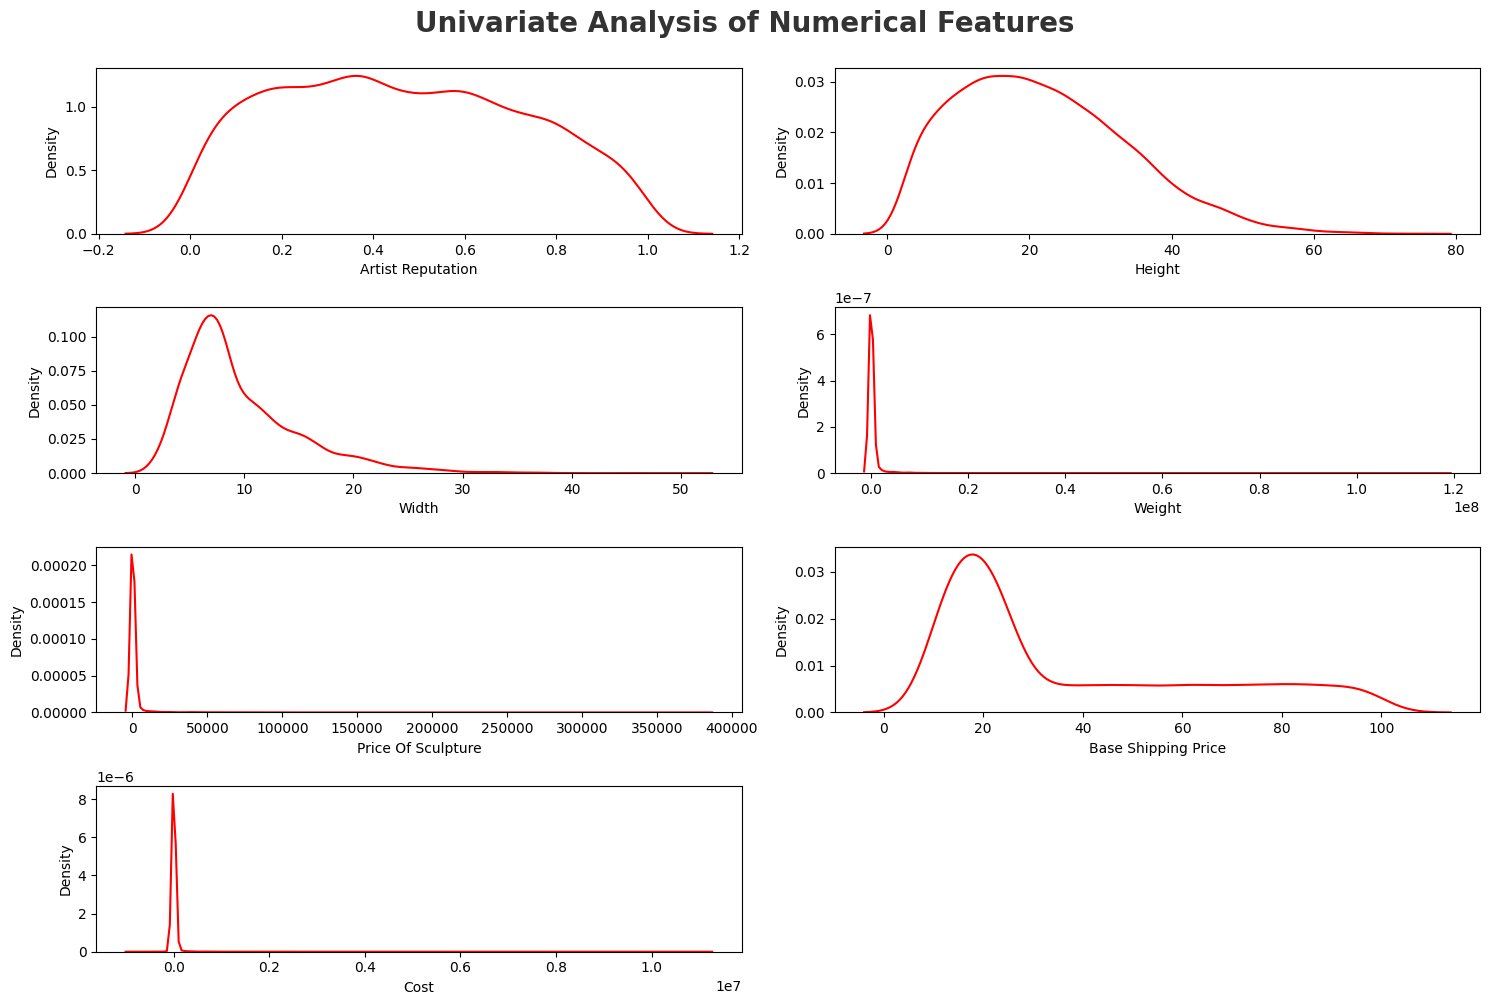

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_cols)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=df[numerical_cols[i]], color='red')
    plt.xlabel(numerical_cols[i])

plt.tight_layout()
plt.show()



<h2>From this we can see that the data is not normally distributed and it is skewed and has so many outliers.
so we replace it with median only cuzz median is not affected with outliers but mean could be</h2>


In [18]:
df1 = df.copy()

In [19]:
for i in numerical_cols:
    df1[i] = df1[i].fillna(df1[i].median())
    

In [20]:
newnumerical_cols = df1.select_dtypes(include=['int64', 'float64']).columns

# 2. Check for null values in those columns
df1[newnumerical_cols].isnull().sum()

Artist Reputation      0
Height                 0
Width                  0
Weight                 0
Price Of Sculpture     0
Base Shipping Price    0
Cost                   0
dtype: int64

now no missing values remianing

<h1>UNIVARIATE ANALYSIS ON COLUMN VALUES</h1>

In [21]:
categorical_columns = []
for i in categorical_cols:
    print(f'{i}: {len(df[i].unique())}')
    if len(df[i].unique()) < 10:
        categorical_columns.append(i)

Customer Id: 6500
Artist Name: 6449
Material: 8
International: 2
Express Shipment: 2
Installation Included: 2
Transport: 4
Fragile: 2
Customer Information: 2
Remote Location: 3
Scheduled Date: 1660
Delivery Date: 1664
Customer Location: 6500


<h2 style="color:#2C3E50; font-size:28px;"><b> Why We Do This</b></h2>

<div style="background-color:#F9F9F9; border-left:6px solid #F39C12; padding:15px; margin-bottom:15px;">
  <h3 style="color:#D35400;">Reason 1: Categorical Data Has Limited, Distinct Values</h3>
  <p style="font-size:16px; color:#2C3E50;">
    Columns like <b>Material</b>, <b>Yes/No</b>, <b>Gender</b>, and <b>Transport</b> usually have a small, fixed set of categories.
    These are <u>not continuous numeric values</u>, so we should <b>not treat them like numerical features</b> in analysis or modeling.
  </p>
</div>

<div style="background-color:#F9F9F9; border-left:6px solid #5DADE2; padding:15px;">
  <h3 style="color:#2471A3;"> Reason 2: Threshold of 10 is a Reasonable Heuristic</h3>
  <p style="font-size:16px; color:#2C3E50;">
    The choice of using <code>&lt; 10</code> unique values as the cutoff for identifying categorical features is not strict,
    but it is a commonly used heuristic.
  </p>
  <ul style="font-size:16px; color:#2C3E50;">
    <li>Columns with <b>fewer unique values</b> often represent labels or categories.</li>
    <li>Columns with <b>more than 10 unique values</b> are more likely to be numerical or continuous features.</li>
    <li>This threshold can be <b>adjusted</b> based on the dataset (e.g., 5, 15) and domain knowledge.</li>
  </ul>
</div>


<h2 style="color:#2980B9;"><b>📊 Univariate Analysis on Categorical Data</b></h2>


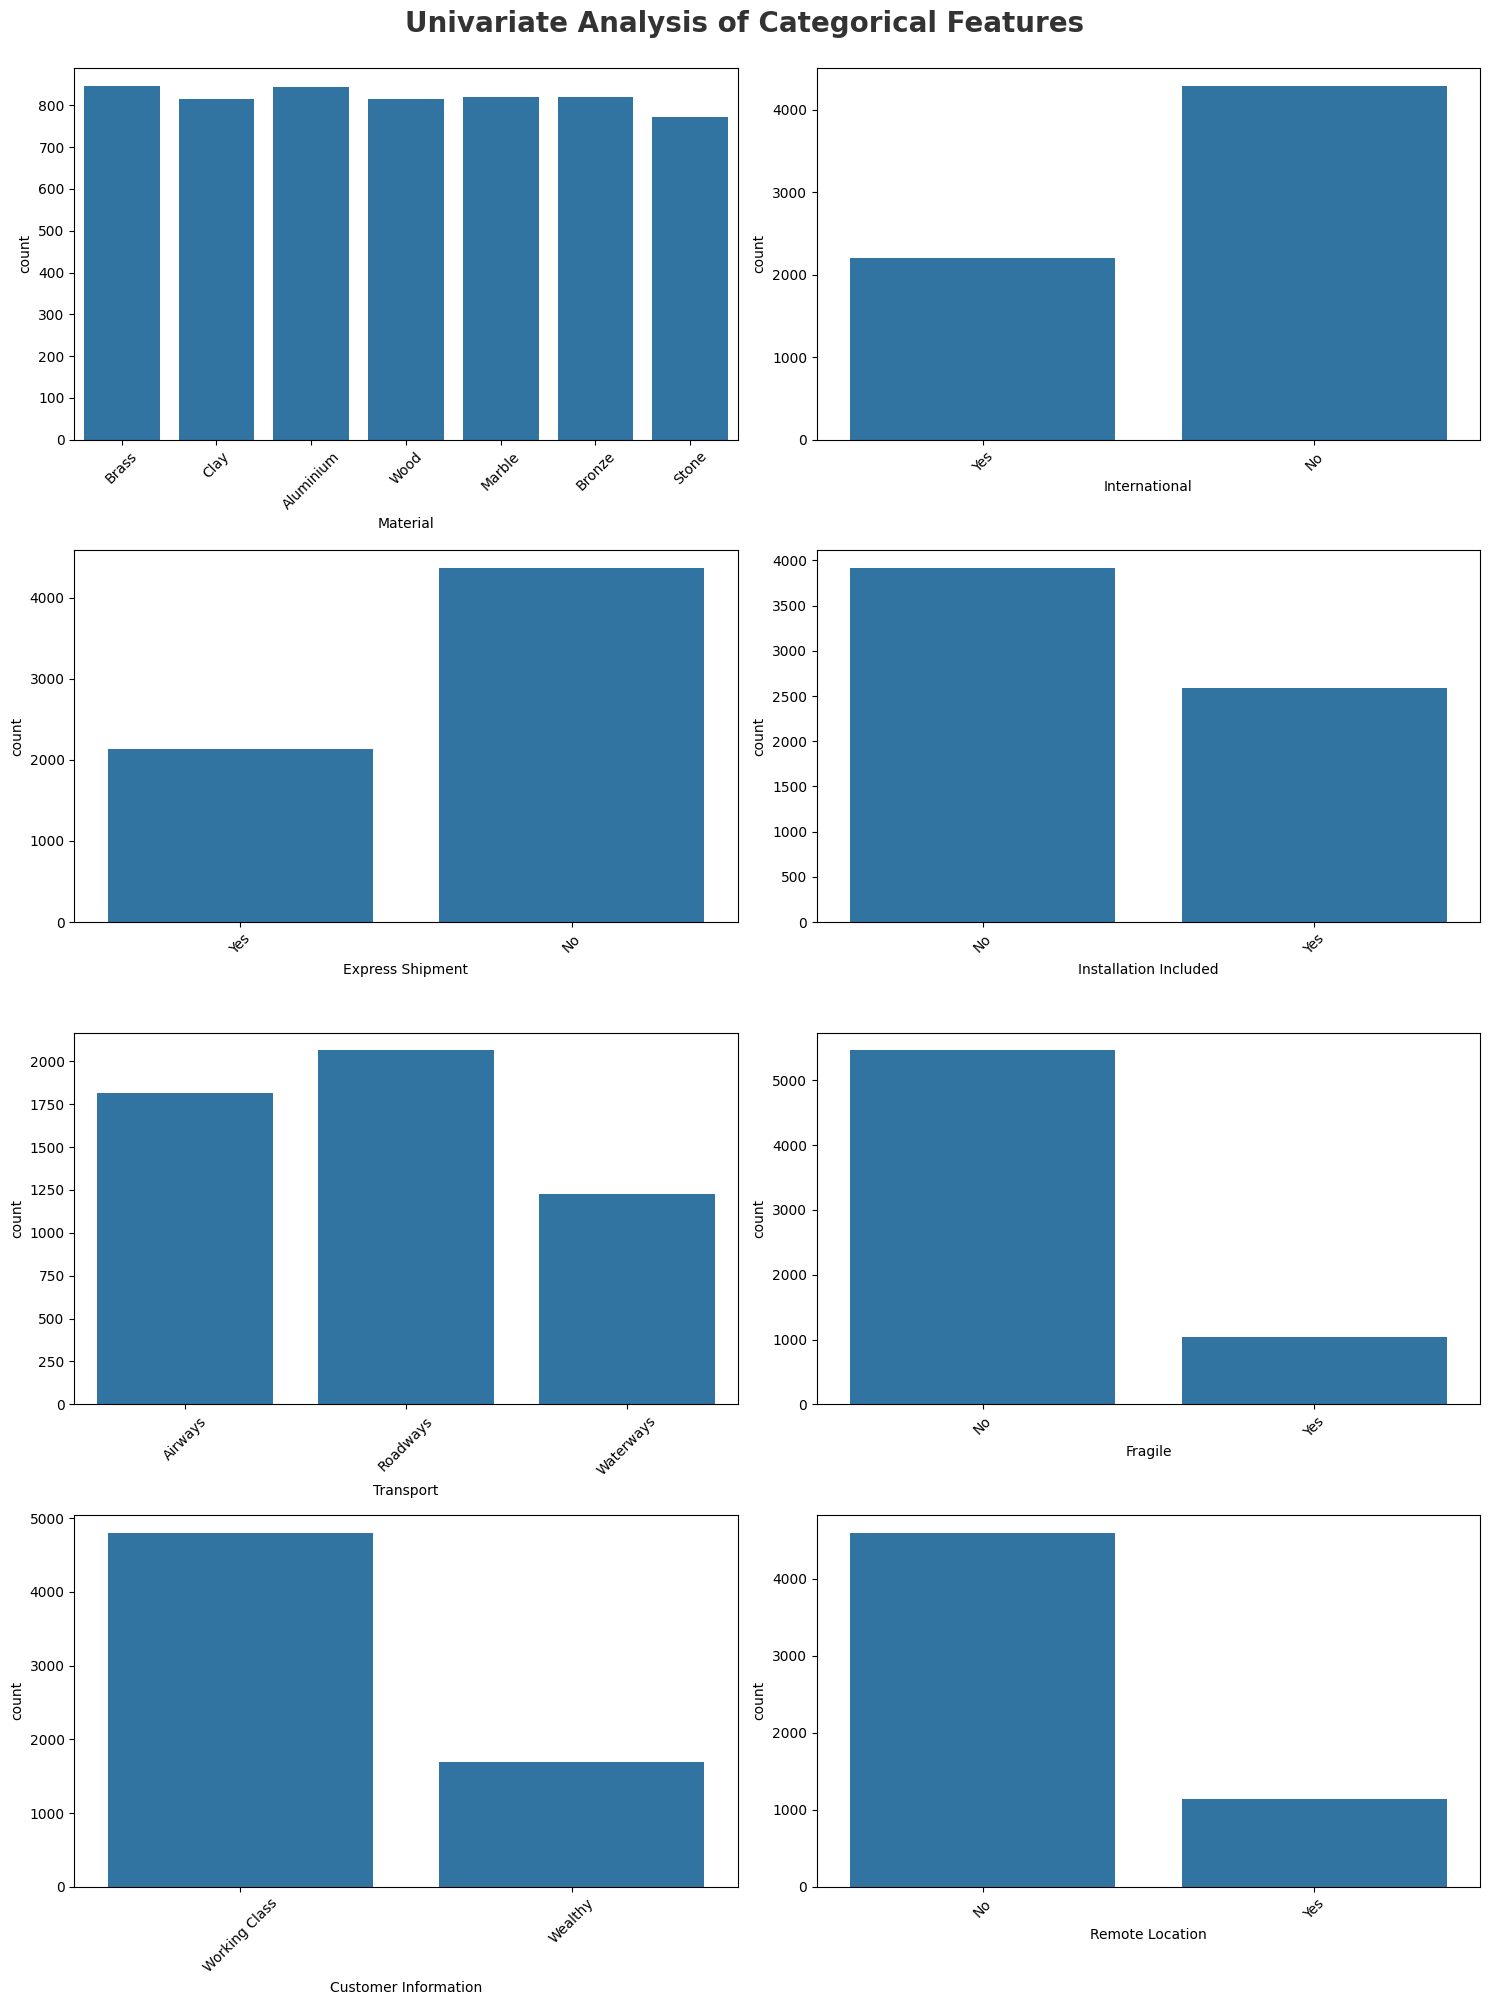

In [22]:
plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(categorical_columns)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=df[categorical_columns[i]])
    plt.xlabel(categorical_columns[i])
    plt.xticks(rotation=45)
    plt.tight_layout()


<h2 style="color:#2C3E50;"><b>2. Standardization and Nornalization</b></h2>

### 📏 Standardization vs Normalization

| Feature               | Standardization                           | Normalization                            |
|------------------------|-------------------------------------------|-------------------------------------------|
| **Definition**         | Rescales data to mean = 0 and std = 1     | Rescales data to a fixed range (usually [0, 1]) |
| **Formula**            | \( z = \frac{x - \mu}{\sigma} \)          | \( x' = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}} \) |
| **Range After Scaling**| No fixed range (values can be negative)   | Fixed range, typically [0, 1]             |
| **Effect on Outliers** | Less affected by outliers                 | Highly sensitive to outliers              |
| **Use Cases**          | Linear models, SVM, PCA, clustering       | KNN, Neural Networks, distance-based models |
| **Skewed Data Handling**| Handles skewed data better               | May distort skewed data                   |

---

### 📦 Conclusion for `shipment.csv`:

The `shipment.csv` dataset contains numerical features like **Weight**, **Height**, and **Width** that are on different scales and may not have fixed minimum and maximum bounds. Since we're not using models that strictly require a [0,1] range and we want to preserve the influence of outliers moderately, **Standardization** is the more appropriate choice.

> ✅ **We applied `StandardScaler` because standardization is more suitable for our dataset's structure and modeling needs.**


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("data/shipment.csv") 
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# (Optional) View the first few rows of the transformed data
print(df_scaled[numerical_cols].head())

In [17]:
# Convert object datatype to datetime
df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'], format='%m/%d/%y')
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'], format='%m/%d/%y')


In [18]:
df['Month'] = pd.to_datetime(df['Scheduled Date']).dt.month
df['Year'] = pd.to_datetime(df['Scheduled Date']).dt.year

numerical_cols.append('Month')
numerical_cols.append('Year')


<h2 style="color:#2C3E50;"><b>3. Feature Selection</b></h2>

<p style="font-size:16px; color:#2C3E50;">
In data preprocessing for machine learning, we often <b>drop columns</b> like <code>Customer Name</code>, <code>Artist Name</code>, or <code>Customer Location</code> even though they may seem important. Here's why:
</p>

<hr style="border:1px solid #ccc;">

<h3 style="color:#D35400;">1️⃣ High Cardinality Makes Models Inefficient</h3>
<ul style="font-size:16px; color:#2C3E50;">
  <li>These columns contain <b>too many unique values</b> (e.g., thousands of names or cities).</li>
  <li>If one-hot encoded, they would create <b>thousands of new columns</b> → very sparse and inefficient.</li>
  <li>This increases <b>model complexity</b>, slows down training, and causes <b>overfitting</b>.</li>
</ul>

<h3 style="color:#D35400;">2️⃣ Often Just Identifiers (Not Informative)</h3>
<ul style="font-size:16px; color:#2C3E50;">
  <li><code>Customer Name</code>, <code>Artist Name</code>, and <code>Customer ID</code> are often <b>unique per row</b> and don't represent generalizable patterns.</li>
  <li>They behave more like <b>row IDs</b> than meaningful features.</li>
</ul>

<h3 style="color:#D35400;">3️⃣ Unstructured or Raw Formats</h3>
<ul style="font-size:16px; color:#2C3E50;">
  <li>Columns like <code>Scheduled Date</code> and <code>Delivery Date</code> are useful, but not in raw form.</li>
  <li>Instead, we should <b>transform them</b> (e.g., calculate delivery delay) before use.</li>
</ul>

<hr style="border:1px solid #ccc;">

<h2 style="color:#2980B9;"><b>✅ When Can You Keep Them?</b></h2>
<p style="font-size:16px; color:#2C3E50;">You can keep high-cardinality columns <b>if you transform them into meaningful features</b>.</p>

<table style="width:100%; border-collapse: collapse; font-size:16px;">
  <thead style="background-color:#f2f2f2;">
    <tr>
      <th style="border: 1px solid #ccc; padding:10px;">Original Column</th>
      <th style="border: 1px solid #ccc; padding:10px;">Transformation</th>
      <th style="border: 1px solid #ccc; padding:10px;">Why</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid #ccc; padding:10px;"><code>Artist Name</code></td>
      <td style="border: 1px solid #ccc; padding:10px;">Count of sculptures per artist</td>
      <td style="border: 1px solid #ccc; padding:10px;">Indicates reputation or popularity</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ccc; padding:10px;"><code>Customer Location</code></td>
      <td style="border: 1px solid #ccc; padding:10px;">Region or city group</td>
      <td style="border: 1px solid #ccc; padding:10px;">Simplifies geography & reduces dimensions</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ccc; padding:10px;"><code>Scheduled Date</code>, <code>Delivery Date</code></td>
      <td style="border: 1px solid #ccc; padding:10px;">Delivery delay = Delivery - Scheduled</td>
      <td style="border: 1px solid #ccc; padding:10px;">Captures shipping performance</td>
    </tr>
  </tbody>
</table>

<hr style="border:1px solid #ccc;">

<h3 style="color:#27AE60;">✨ Pro Tip:</h3>
<p style="font-size:16px; color:#2C3E50;">
Rather than immediately dropping columns, ask yourself: <b>Can I extract meaningful patterns or numerical representations from this?</b> If yes, transform and keep it. Otherwise, drop it to reduce noise and complexity.
</p>


In [19]:
to_drop_columns = ['Customer Id', 'Artist Name', 'Customer Location', 'Scheduled Date', 'Delivery Date']

In [20]:
df.drop(columns=to_drop_columns, inplace=True)

In [21]:
df

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Cost,Month,Year
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,-283.29,6,2015
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,-159.96,3,2017
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,-154.29,3,2015
3,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,-161.16,5,2015
4,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,-159.23,12,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,0.37,37.0,10.0,16551.0,Brass,28.28,38.46,Yes,Yes,No,Airways,No,Wealthy,Yes,872.43,3,2018
6496,0.67,15.0,NaN,18981.0,NaN,67.18,27.72,No,No,No,Roadways,No,Working Class,No,1347.02,8,2015
6497,0.68,19.0,8.0,587.0,Clay,6.92,10.38,Yes,No,No,NaN,Yes,Wealthy,No,354.55,4,2019
6498,0.02,33.0,9.0,1269377.0,Stone,2929.13,69.76,No,Yes,No,Roadways,No,Working Class,Yes,5037.50,3,2019


In [ ]:
categorical_columns = df.select_dtypes(include='object')

# Check which categorical columns have missing values
missing_categorical = categorical_columns.isnull().sum()
missing_categorical = missing_categorical[missing_categorical > 0]

# Display the result
print("🧩 Categorical columns with missing values:")
print(missing_categorical)

In [23]:
df['Material'] = df['Material'].fillna(df['Material'].mode()[0])
df['Transport'] = df['Transport'].fillna('Unknown')
df['Remote Location'] = df['Remote Location'].fillna(df['Remote Location'].mode()[0])


<h2 style="color:#2C3E50;"><b>3.1 Why these imputation choices?</b></h2>

<ul style="font-size:18px; color:#34495e; line-height:1.6;">
  <li>
    <b>🧱 Material:</b> The distribution is well-balanced, with <b>Brass</b> being the most common material. 
    Imputing with the mode is a safe choice that preserves the overall distribution.
  </li>

  <li>
    <b>🚚 Transport:</b> Since this feature is more open-ended and may vary (e.g., Roadways, Airways), filling missing values with <b>"Unknown"</b> helps retain potentially meaningful missingness without introducing bias.
  </li>

  <li>
    <b>📍 Remote Location:</b> The majority of entries are <b>"No"</b>. Imputing missing values with the mode avoids skewing the data and reflects the most likely scenario.
  </li>
</ul>


In [60]:
df


,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Cost,Month,Year
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,-283.29,6,2015
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,-159.96,3,2017
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,-154.29,3,2015
3,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,Unknown,No,Wealthy,Yes,-161.16,5,2015
4,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,-159.23,12,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,0.37,37.0,10.0,16551.0,Brass,28.28,38.46,Yes,Yes,No,Airways,No,Wealthy,Yes,872.43,3,2018
6496,0.67,15.0,NaN,18981.0,Brass,67.18,27.72,No,No,No,Roadways,No,Working Class,No,1347.02,8,2015
6497,0.68,19.0,8.0,587.0,Clay,6.92,10.38,Yes,No,No,Unknown,Yes,Wealthy,No,354.55,4,2019
6498,0.02,33.0,9.0,1269377.0,Stone,2929.13,69.76,No,Yes,No,Roadways,No,Working Class,Yes,5037.50,3,2019


<h2 style="color:#2C3E50;"><b>4 Outlier Removal</b></h2>

Outliers are data points that differ significantly from other observations. They can skew statistical analyses and negatively impact model performance, especially in regression and clustering algorithms.

---

### 🔧 Common Methods for Outlier Detection and Removal

| Method                  | Description |
|-------------------------|-------------|
| **IQR Method**          | Identifies outliers as values falling below Q1 - 1.5×IQR or above Q3 + 1.5×IQR. |
| **Z-Score Method**      | Flags outliers by standardizing values and identifying those with a Z-score > 3 or < -3. |
| **Log Transformation**  | Reduces the impact of large values by applying a log scale. Effective for right-skewed data. |
| **Power Transformation**| Applies Box-Cox or Yeo-Johnson transformations to stabilize variance and normalize data. |
| **Winsorization**       | Caps extreme values to a specified percentile range (e.g., 5th–95th). |
| **Model-based Methods** | Uses algorithms like Isolation Forest or DBSCAN to detect anomalies. |

---

### 📦 Why We Use the **IQR Method** for `shipment.csv`

After analyzing the `shipment.csv` dataset, the **IQR method** was found to be the most suitable for the following reasons:

- ✅ **Simplicity and Interpretability**: The IQR method is easy to implement and doesn't alter the original data distribution. It simply filters values outside a defined range.
- ✅ **Preserves Meaningful Scale**: Log and power transformations distort the data scale, which may harm interpretability in features like `Weight`, `Height`, or `Artist Reputation`.
- ✅ **No Need for Normality Assumption**: Unlike Z-score or Power transformations, IQR does not assume the data is normally distributed — which is beneficial because many features in the shipment data (e.g., `Price`, `Base Shipping Cost`) are skewed.
- ✅ **Avoids Unwanted Data Compression**: Log and power transformations compress large values, which may be legitimate in our domain (e.g., an expensive sculpture or large item).

---

### 📌 Conclusion

> For the `shipment.csv` dataset, we recommend using the **Interquartile Range (IQR) method** for outlier detection and removal. It is robust, non-parametric, and better preserves the interpretability and structure of the original shipment data compared to power or log transformations.


In [3]:
outlier_feature = ['Price Of Sculpture', 'Weight']

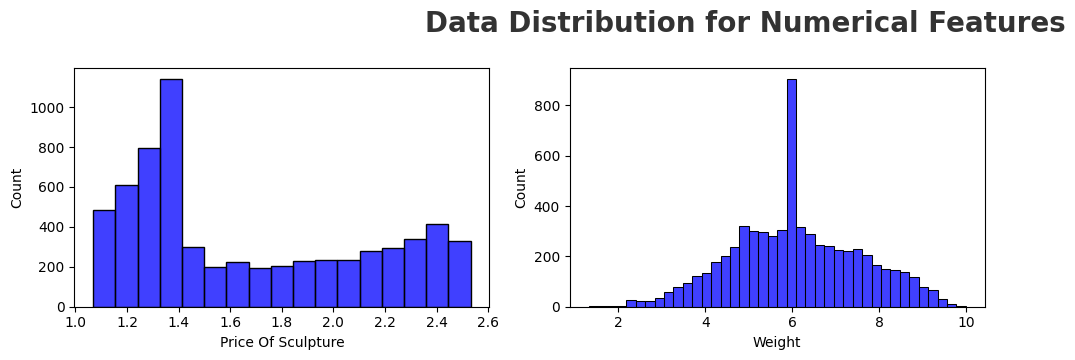

In [24]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(standardize=False)

outlier_data = df1[outlier_feature]
df1[outlier_feature] = pt.fit_transform(df1[outlier_feature])
df_outlier = pd.DataFrame(outlier_data, columns=outlier_feature)
plt.figure(figsize=(15, 15))
plt.suptitle('Data Distribution for Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(outlier_feature)):
    plt.subplot(5, 3, i+1)
    sns.histplot(x=df1[outlier_feature[i]], color='b')
    plt.xlabel(outlier_feature[i])
    plt.tight_layout()

In [25]:
df1[outlier_feature].skew()

Price Of Sculpture    0.478648
Weight                0.027309
dtype: float64

<h4>🔧 Removing Outliers from Target Column</h4>

<p>
Most machine learning models tend to perform better on <strong>clean, noiseless data</strong>. Outliers in the target variable can <strong>skew the model's predictions</strong> and introduce bias. 
Removing or transforming these extreme values can lead to more <strong>robust and reliable results</strong>.
</p>

<hr>

<h4>📊 Cost Distribution Plot</h4>
<p>The plot below shows the distribution of the target variable <code>Cost</code>, including its skewness and presence of outliers:</p>


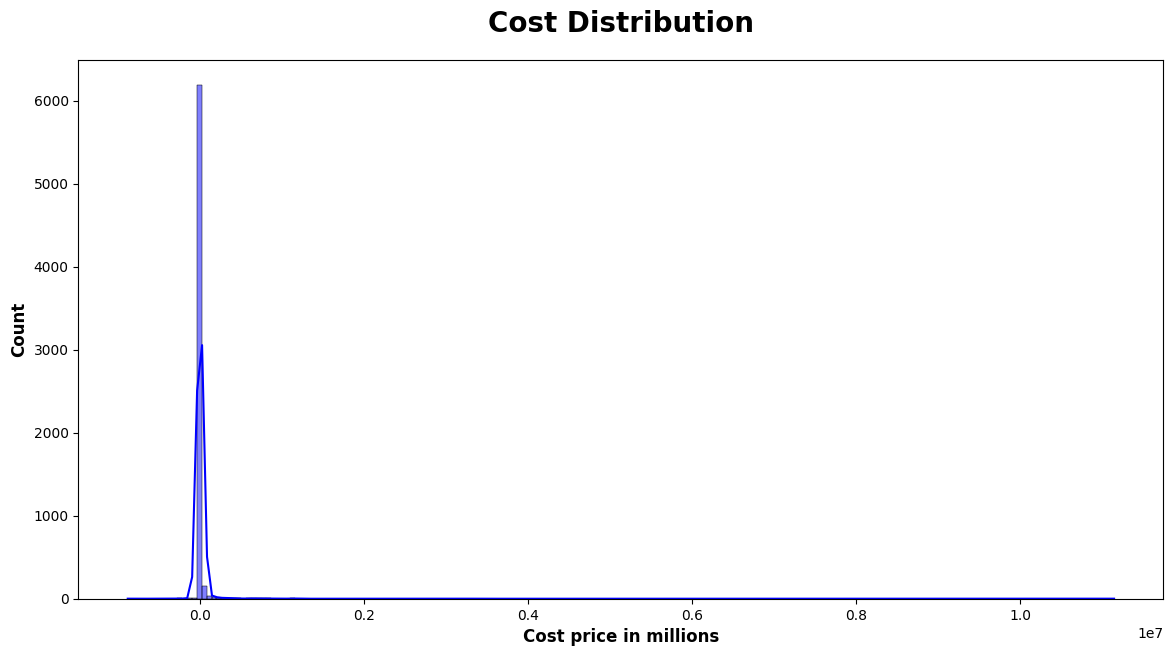

In [27]:
plt.subplots(figsize=(14, 7))
sns.histplot(df['Cost'], bins=200, kde=True, color='b')
plt.title("Cost Distribution", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Cost price in millions", weight="bold", fontsize=12)
plt.show()


In [29]:
df['Cost'] = df['Cost'].abs()

(array([ 650., 1815., 1374.,  867.,  536.,  289.,  166.,   89.,   40.,
          15.]),
 array([1.69867741, 1.81345375, 1.92823009, 2.04300643, 2.15778277,
        2.27255911, 2.38733545, 2.50211178, 2.61688812, 2.73166446,
        2.8464408 ]),
 <BarContainer object of 10 artists>)

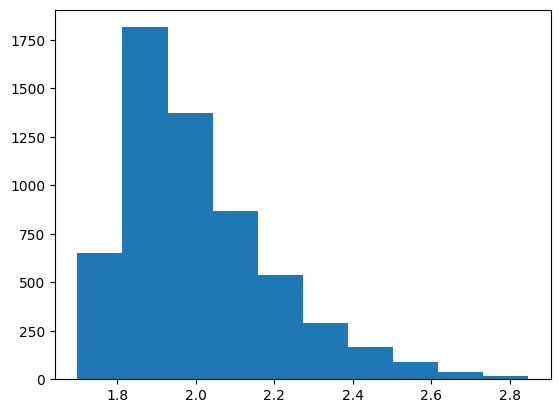

In [30]:
 df1['Cost'] = np.log1p(df1['Cost'])
plt.hist(df1['Cost'])

<h2 style="color:#2C3E50;"><b>5. Encoding Categorical Variables</b></h2>




<h2 style="color:#2C3E50;"><b>5. Encoding Categorical Variables</b></h2>
Categorical features must be converted into numerical values before feeding them into most machine learning models. Choosing the right encoding strategy is essential for performance and interpretability.

---

### 🛠️ Common Encoding Techniques

| Encoding Method       | Description | When to Use |
|------------------------|-------------|-------------|
| **One-Hot Encoding**   | Creates binary columns for each category (0/1). | When categories are **nominal** (no order), and number of categories is **small to moderate**. |
| **Ordinal Encoding**   | Assigns integer values to categories (e.g., low=1, medium=2, high=3). | When categories are **ordinal** (inherent order), such as education level or customer satisfaction. |
| **Target Encoding / Mean Encoding** | Replaces categories with the mean of the target variable for that category. | Useful for **high-cardinality** categorical features in **regression or classification**, with risk of overfitting. |
| **Frequency Encoding** | Encodes categories with their frequency counts. | When you want a compact representation, especially in **tree-based models**. |




In [3]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer


categorical_features_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder()),
]
)

preprocessor = ColumnTransformer(
    [
      
        ("Categorical Features Pipeline",categorical_features_pipeline, categorical_columns)
    ]
     
)

NameError: name 'categorical_columns' is not defined

<h2 style="color:#2C3E50;"><b>6. Feature Extraction</b></h2>

When working with date columns like **Scheduled Date** or **Delivery Date**, we don’t usually feed the full datetime object directly into a machine learning model. Instead, we extract specific components from the date that can help uncover hidden patterns and trends.

---

### 🧠 Reasons for Feature Extraction from Dates:

#### ✅ 1. **Make Dates Machine-Readable**
- Most models cannot interpret datetime values directly.
- Extracting features like `Month` and `Year` converts complex datetime objects into numerical values that models can understand.

#### ✅ 2. **Capture Seasonal Patterns**
- The `Month` can reveal **seasonality** in data.
    - Example: Higher shipments during holidays (e.g., December).
- Useful for time-sensitive businesses.

#### ✅ 3. **Track Year-over-Year Trends**
- The `Year` helps detect **long-term trends**.
    - Example: Increase in order volumes every year.

### 🧠 Principal Component Analysis (PCA)

**Principal Component Analysis (PCA)** is a dimensionality reduction technique that transforms a large set of correlated features into a smaller set of **uncorrelated** components while preserving as much variability (information) as possible.

---

### 🔍 When Should You Use PCA?

| Use Case                                      | Explanation |
|----------------------------------------------|-------------|
| ✅ Multicollinearity Removal                  | PCA transforms correlated features into independent (orthogonal) principal components. |
| ✅ Dimensionality Reduction                   | Useful when you have a **high number of features**, especially after one-hot encoding. |
| ✅ Improved Model Efficiency                  | Reduces computational cost and overfitting in high-dimensional datasets. |
| ⚠️ When Feature Interpretability Isn't Critical | PCA components lose their original meaning, so avoid PCA if explainability is key. |

---

### 📦 Should We Apply PCA to the Shipment Dataset?

Based on your EDA:

- The key features (`Weight`, `Height`, `Width`, `Price Of Sculpture`, `Base Shipping Price`) show **moderate to high correlation**, which may introduce **multicollinearity**.
- There is **no extremely high number of features**, but the combination of **correlated numerical features + one-hot encoded categorical features** increases the dimensionality.
- Since your target variable `Cost` is heavily skewed and has outliers, PCA **can help stabilize modeling** by reducing redundancy and improving robustness.
- You're not relying heavily on interpretability for linear coefficients — so **using PCA will not harm explainability in this case**.

✅ **Conclusion**:
> PCA is **appropriate** for the shipment dataset as it helps address multicollinearity, reduces dimensionality (especially after encoding), and may improve model performance and generalization.

---

### 🛠️ Code: Applying PCA After Preprocessing



In [8]:

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import pandas as pd

df = pd.read_csv("data/shipment.csv")

# Define feature groups
categorical_columns = ['Material', 'Transport', 'Remote Location', 'Fragile', 'Installation Included', 'International', 'Express Shipment']
numerical_columns = ['Weight', 'Height', 'Width', 'Artist Reputation', 'Price Of Sculpture', 'Base Shipping Price']

# Categorical preprocessing pipeline
categorical_features_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Numerical preprocessing pipeline
numerical_features_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_features_pipeline, numerical_columns),
    ('cat', categorical_features_pipeline, categorical_columns)
])

# Full pipeline including PCA
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95))  # Retain 95% of explained variance
])

# Apply to your features
X_processed = full_pipeline.fit_transform(df.drop(columns=['Customer Id', 'Customer Location', 'Cost']))
